## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aaron\AppData\Roa

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 14s 273us/step - loss: 2.2662 - acc: 0.1583 - val_loss: 2.2107 - val_acc: 0.1969
Epoch 2/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.1784 - acc: 0.2183 - val_loss: 2.1502 - val_acc: 0.2365
Epoch 3/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.1257 - acc: 0.2485 - val_loss: 2.1036 - val_acc: 0.2574
Epoch 4/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.0816 - acc: 0.2702 - val_loss: 2.0626 - val_acc: 0.2739
Epoch 5/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.0438 - acc: 0.2866 - val_loss: 2.0286 - val_acc: 0.2924
Epoch 6/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.0125 - acc: 0.2982 - val_loss: 1.9999 - val_acc: 0.3038
Epoch 7/500
50000/50000 [

50000/50000 [==============================] - 5s 110us/step - loss: 1.6737 - acc: 0.4192 - val_loss: 1.6822 - val_acc: 0.4116
Epoch 56/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.6706 - acc: 0.4191 - val_loss: 1.6775 - val_acc: 0.4126
Epoch 57/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.6672 - acc: 0.4219 - val_loss: 1.6725 - val_acc: 0.4162
Epoch 58/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.6643 - acc: 0.4222 - val_loss: 1.6704 - val_acc: 0.4155
Epoch 59/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.6610 - acc: 0.4228 - val_loss: 1.6679 - val_acc: 0.4207
Epoch 60/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.6582 - acc: 0.4238 - val_loss: 1.6667 - val_acc: 0.4171
Epoch 61/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.6552 - acc: 0.4241 - val_loss: 1.6611 - val_acc: 0.4202
Epoch 62/500
50000/50000 [=======

50000/50000 [==============================] - 5s 101us/step - loss: 1.5316 - acc: 0.4685 - val_loss: 1.5538 - val_acc: 0.4568
Epoch 114/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5296 - acc: 0.4672 - val_loss: 1.5515 - val_acc: 0.4567
Epoch 115/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.5279 - acc: 0.4687 - val_loss: 1.5512 - val_acc: 0.4597
Epoch 116/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.5258 - acc: 0.4707 - val_loss: 1.5505 - val_acc: 0.4553
Epoch 117/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5241 - acc: 0.4698 - val_loss: 1.5514 - val_acc: 0.4548
Epoch 118/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.5222 - acc: 0.4707 - val_loss: 1.5484 - val_acc: 0.4570
Epoch 119/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5202 - acc: 0.4713 - val_loss: 1.5504 - val_acc: 0.4572
Epoch 120/500
50000/50000 [=

50000/50000 [==============================] - 5s 101us/step - loss: 1.4352 - acc: 0.5007 - val_loss: 1.4842 - val_acc: 0.4783
Epoch 172/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.4339 - acc: 0.5024 - val_loss: 1.4787 - val_acc: 0.4773
Epoch 173/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.4326 - acc: 0.5023 - val_loss: 1.4807 - val_acc: 0.4787
Epoch 174/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4315 - acc: 0.5031 - val_loss: 1.4915 - val_acc: 0.4743
Epoch 175/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4293 - acc: 0.5037 - val_loss: 1.4876 - val_acc: 0.4756
Epoch 176/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4278 - acc: 0.5041 - val_loss: 1.4797 - val_acc: 0.4798
Epoch 177/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.4262 - acc: 0.5037 - val_loss: 1.4750 - val_acc: 0.4787
Epoch 178/500
50000/50000 [===

50000/50000 [==============================] - 5s 99us/step - loss: 1.3542 - acc: 0.5284 - val_loss: 1.4329 - val_acc: 0.4934
Epoch 230/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3528 - acc: 0.5297 - val_loss: 1.4391 - val_acc: 0.4907
Epoch 231/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.3516 - acc: 0.5294 - val_loss: 1.4291 - val_acc: 0.4955
Epoch 232/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.3500 - acc: 0.5301 - val_loss: 1.4288 - val_acc: 0.4964
Epoch 233/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3486 - acc: 0.5307 - val_loss: 1.4350 - val_acc: 0.4936
Epoch 234/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.3474 - acc: 0.5305 - val_loss: 1.4226 - val_acc: 0.4976
Epoch 235/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.3464 - acc: 0.5325 - val_loss: 1.4314 - val_acc: 0.4971
Epoch 236/500
50000/50000 [======

50000/50000 [==============================] - 5s 98us/step - loss: 1.2818 - acc: 0.5532 - val_loss: 1.4158 - val_acc: 0.5008
Epoch 288/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.2800 - acc: 0.5530 - val_loss: 1.4103 - val_acc: 0.5003
Epoch 289/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.2791 - acc: 0.5549 - val_loss: 1.3870 - val_acc: 0.5108
Epoch 290/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.2773 - acc: 0.5537 - val_loss: 1.3910 - val_acc: 0.5102
Epoch 291/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.2760 - acc: 0.5556 - val_loss: 1.4313 - val_acc: 0.4955
Epoch 292/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.2756 - acc: 0.5556 - val_loss: 1.3931 - val_acc: 0.5063
Epoch 293/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.2743 - acc: 0.5569 - val_loss: 1.3862 - val_acc: 0.5087
Epoch 294/500
50000/50000 [==

50000/50000 [==============================] - 5s 98us/step - loss: 1.2149 - acc: 0.5758 - val_loss: 1.3865 - val_acc: 0.5109
Epoch 346/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2134 - acc: 0.5764 - val_loss: 1.3651 - val_acc: 0.5157
Epoch 347/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2129 - acc: 0.5771 - val_loss: 1.3655 - val_acc: 0.5183
Epoch 348/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2108 - acc: 0.5772 - val_loss: 1.4031 - val_acc: 0.5075
Epoch 349/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2092 - acc: 0.5784 - val_loss: 1.3660 - val_acc: 0.5158
Epoch 350/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2085 - acc: 0.5787 - val_loss: 1.3630 - val_acc: 0.5153
Epoch 351/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.2067 - acc: 0.5784 - val_loss: 1.3770 - val_acc: 0.5117
Epoch 352/500
50000/50000 [=======

50000/50000 [==============================] - 5s 97us/step - loss: 1.1492 - acc: 0.6004 - val_loss: 1.3500 - val_acc: 0.5255
Epoch 404/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1497 - acc: 0.6009 - val_loss: 1.3544 - val_acc: 0.5211
Epoch 405/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1481 - acc: 0.6006 - val_loss: 1.3485 - val_acc: 0.5203
Epoch 406/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.1468 - acc: 0.6014 - val_loss: 1.3412 - val_acc: 0.5268
Epoch 407/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1461 - acc: 0.6016 - val_loss: 1.3527 - val_acc: 0.5221
Epoch 408/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.1459 - acc: 0.6023 - val_loss: 1.3828 - val_acc: 0.5112
Epoch 409/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.1442 - acc: 0.6024 - val_loss: 1.3493 - val_acc: 0.5246
Epoch 410/500
50000/50000 [===

50000/50000 [==============================] - 5s 100us/step - loss: 1.0898 - acc: 0.6225 - val_loss: 1.3835 - val_acc: 0.5172
Epoch 462/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.0883 - acc: 0.6233 - val_loss: 1.3487 - val_acc: 0.5210
Epoch 463/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.0861 - acc: 0.6238 - val_loss: 1.3491 - val_acc: 0.5196
Epoch 464/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0852 - acc: 0.6232 - val_loss: 1.3412 - val_acc: 0.5293
Epoch 465/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0859 - acc: 0.6244 - val_loss: 1.3373 - val_acc: 0.5283
Epoch 466/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.0858 - acc: 0.6248 - val_loss: 1.3985 - val_acc: 0.5082
Epoch 467/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0834 - acc: 0.6244 - val_loss: 1.3348 - val_acc: 0.5272
Epoch 468/500
50000/50000 [====

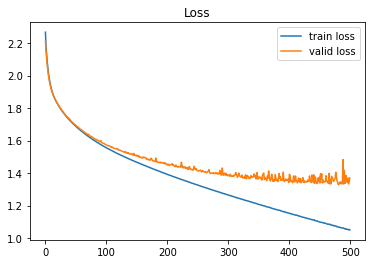

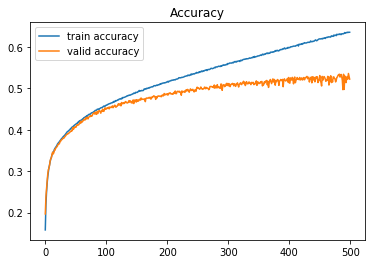

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()